<a href="https://colab.research.google.com/github/Xphi310302/Recommender_System/blob/main/Demographic_Content_based_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Opening JSON file
f = open('/content/drive/MyDrive/Recommender_System/data/11000.json')
# returns JSON object as  a dictionary
data = json.load(f)
data = pd.DataFrame(data)
data1 = data.copy()

In [3]:
data = data.copy()[['id','title','likeCount', 'viewCount', 'commentCount', 'verified','username','category']]
data.head()

,id,title,likeCount,viewCount,commentCount,verified,username,category
0,alG1ijCs5ZM,Best friend,114221.0,3043710.0,1.0,True,HERO TEAM,Entertainment
1,QObXArTKxkw,Phim ngắn| Hào quang quý cô - Tập 10 | Mai Tha...,926.0,55408.0,5.0,False,Mai Thanh Nhàn,People & Blogs
2,itmQmrECkvc,Người mẹ phiền phức P2,2214.0,94244.0,18.0,True,Vân Vân Và Vân Vân,Entertainment
3,eE2gwWHFreM,Cho xin miếng đi màaa 👉🏻👈🏻,145658.0,3779883.0,2.0,True,HERO TEAM,Entertainment
4,JHQtcvzTSTs,Tiệm Bánh Tuổi Thơ Bất Ổn P133,236360.0,7632125.0,549.0,False,Cơm Tuổi Thơ,People & Blogs


# EDA

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9547 entries, 0 to 11149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9547 non-null   object 
 1   title         9547 non-null   object 
 2   likeCount     9547 non-null   float64
 3   viewCount     9547 non-null   float64
 4   commentCount  9547 non-null   float64
 5   verified      9547 non-null   bool   
 6   username      9547 non-null   object 
 7   category      9547 non-null   object 
dtypes: bool(1), float64(3), object(4)
memory usage: 606.0+ KB


In [14]:
categories = data.category.unique()
categories

array(['Entertainment', 'People & Blogs', 'Pets & Animals', 'Gaming',
       'Film & Animation', 'Howto & Style', 'Music', 'Comedy', 'Sports',
       'News & Politics', 'Travel & Events', 'Education',
       'Science & Technology', 'Autos & Vehicles'], dtype=object)

In [15]:
def find_missing_percent(data):
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        missinginfo = pd.DataFrame({"ColumnName" : col,
                       "TotalMissingVals" : data[col].isnull().sum()}, index = [0])
        miss_df = pd.concat([miss_df, missinginfo], ignore_index = True)
    miss_df = miss_df[miss_df["TotalMissingVals"] > 0].reset_index(drop = True)
    miss_df["PercentMissing"] = (miss_df["TotalMissingVals"]/data.shape[0])*100
    return miss_df

In [16]:
miss_df = find_missing_percent(data)
missing_cols = list(miss_df["ColumnName"])
print("Missing Cols :", missing_cols)
display(miss_df.T)

Missing Cols : []


""
ColumnName
TotalMissingVals
PercentMissing


Small missing values

# Missing handling

In [17]:
# lisewise deletion
def listwise_deletion(data):
    for col in data.columns:
        miss_df = data[col][data[col].isnull()]
        miss_ind = miss_df.index
        data = data.drop(miss_ind, axis = 0)
    return data, miss_df

In [18]:
data, miss_df = listwise_deletion(data)

In [19]:
numeric_cols = list(data.select_dtypes(['float','int']).columns)
categoric_cols = list(data.select_dtypes('object').columns)
missing_numeric_cols = np.intersect1d(numeric_cols, missing_cols) # Intersect two lists
missing_categoric_cols = np.intersect1d(categoric_cols, missing_cols)
good_cols = [col for col in data.columns if col not in missing_numeric_cols and col not in missing_categoric_cols]
print(f"Missing Numeric Columns : {missing_numeric_cols}")
# print(f"Missing Categoric Columns : {missing_categoric_cols}")
missing_categoric_cols = np.array(['category', 'verified'])
print(f"Good Columns : {good_cols}")

Missing Numeric Columns : []
Good Columns : ['id', 'title', 'likeCount', 'viewCount', 'commentCount', 'verified', 'username', 'category']


In [20]:
def mean_imputation(data, missing_numeric_cols):
    for col in missing_numeric_cols:
        data[col] = data[col].fillna(data[col].mean())
    return data
def mode_imputation(data, missing_categoric_cols):
    for col in missing_categoric_cols:
        data[col] = data[col].fillna(data[col].mode().iloc[0])
    return data

In [21]:
data_imp_byvalue = mean_imputation(data, missing_numeric_cols)
data_imp_byvalue = mode_imputation(data_imp_byvalue,missing_categoric_cols)
miss_df = find_missing_percent(data_imp_byvalue)
print(f"shape before {data.shape} and after {data_imp_byvalue.shape} imputation by mean")
display(miss_df)

shape before (9547, 8) and after (9547, 8) imputation by mean


,ColumnName,TotalMissingVals,PercentMissing


# Data modelling

In [22]:
def FeatureEngineering(data_modelling):
    data_modelling['engagementRate'] = (data_modelling['likeCount'] + data_modelling['commentCount'])/data_modelling['viewCount']
    return data_modelling

In [23]:
data_modelling = FeatureEngineering(data)
display(data_modelling.head())
print(data_modelling.shape)

,id,title,likeCount,viewCount,commentCount,verified,username,category,engagementRate
0,alG1ijCs5ZM,Best friend,114221.0,3043710.0,1.0,True,HERO TEAM,Entertainment,0.037527
1,QObXArTKxkw,Phim ngắn| Hào quang quý cô - Tập 10 | Mai Tha...,926.0,55408.0,5.0,False,Mai Thanh Nhàn,People & Blogs,0.016803
2,itmQmrECkvc,Người mẹ phiền phức P2,2214.0,94244.0,18.0,True,Vân Vân Và Vân Vân,Entertainment,0.023683
3,eE2gwWHFreM,Cho xin miếng đi màaa 👉🏻👈🏻,145658.0,3779883.0,2.0,True,HERO TEAM,Entertainment,0.038536
4,JHQtcvzTSTs,Tiệm Bánh Tuổi Thơ Bất Ổn P133,236360.0,7632125.0,549.0,False,Cơm Tuổi Thơ,People & Blogs,0.031041


(9547, 9)


In [24]:
data_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9547 entries, 0 to 11149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9547 non-null   object 
 1   title           9547 non-null   object 
 2   likeCount       9547 non-null   float64
 3   viewCount       9547 non-null   float64
 4   commentCount    9547 non-null   float64
 5   verified        9547 non-null   bool   
 6   username        9547 non-null   object 
 7   category        9547 non-null   object 
 8   engagementRate  9547 non-null   float64
dtypes: bool(1), float64(4), object(4)
memory usage: 680.6+ KB


# Data distribution visualization

In [20]:
skew_limit = 0.5
skew_vals = data_modelling[['engagementRate','commentCount' ,'likeCount','viewCount']].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
display(skew_cols.T)

,likeCount,viewCount,engagementRate,commentCount
Skew,14.140684,12.971143,7.969269,2.054467


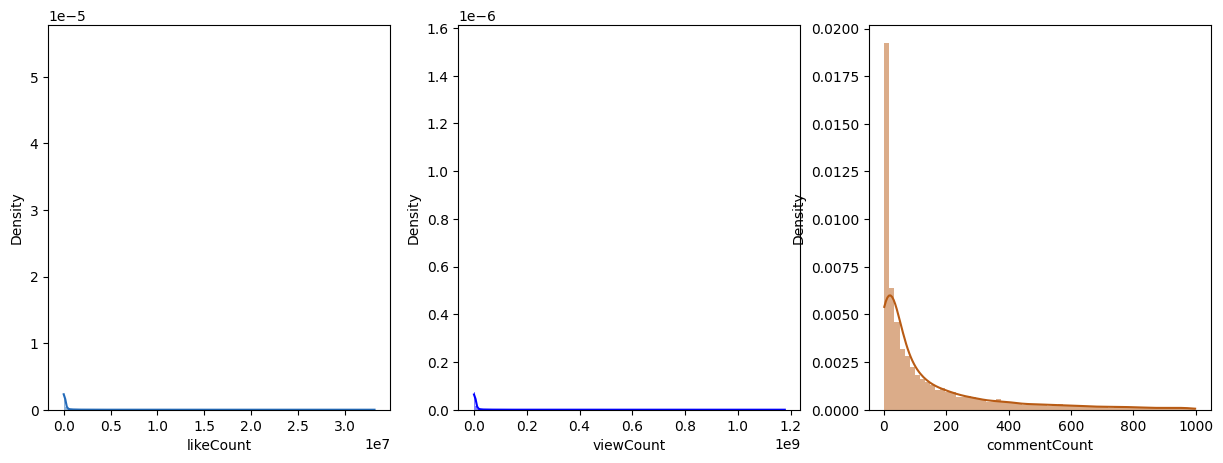

In [21]:
fig, (ax_positive, ax_target, ax_negative) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data['likeCount'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(data['viewCount'],kde=True, stat='density', linewidth=0, color = 'blue', ax=ax_target)
sns.histplot(data['commentCount'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)
plt.show()

# Demographic_based Recommender

## Ranking content of videos

In [ ]:
# Calculate popularity points function
def ranked_points(df):
    likeCount = df['likeCount']
    viewCount = df['viewCount']
    commentCount = df['commentCount']
    return commentCount + 0.5*likeCount + 0.1*viewCount

In [ ]:
# Define a new feature 'point' and calculate its value with `ranked_points`
data_modelling['point'] = data_modelling.apply(ranked_points, axis=1)

In [ ]:
data_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9547 entries, 0 to 11149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9547 non-null   object 
 1   title           9547 non-null   object 
 2   likeCount       9547 non-null   float64
 3   viewCount       9547 non-null   float64
 4   commentCount    9547 non-null   float64
 5   verified        9547 non-null   bool   
 6   category        9547 non-null   object 
 7   engagementRate  9547 non-null   float64
 8   point           9547 non-null   float64
dtypes: bool(1), float64(5), object(3)
memory usage: 680.6+ KB


In [ ]:
# Function to takes top 10 youtube video from input category
def get_top_10_by_category(dataframe, category):
    # Filter the dataframe by the specified category
    filtered_df = dataframe[dataframe['category'] == category]
    # Sort the filtered dataframe by 'point' column in descending order
    top_10_rows = filtered_df.sort_values(['verified','point'], ascending=False).head(10)
    # Select the top 10 rows with the highest points
    return top_10_rows

In [ ]:
category_name = 'Science & Technology'  # Specify the category you want to retrieve the top 10 rows for
top_10_category_rows = get_top_10_by_category(data_modelling, category_name)
top_10_category_rows

,id,title,likeCount,viewCount,commentCount,verified,category,engagementRate,point
2645,-I63SWT55bk,How glass materials are made,3666034.0,215337384.0,5.0,True,Science & Technology,0.017025,23366760.4
2757,15dn1SzpmGo,Compilation Of Best Candy Crushes With Hydraul...,2907164.0,218451500.0,6.0,True,Science & Technology,0.013308,23298738.0
4513,KRjcEoadiUE,Making Diamond out of Trash - Sand Casting,4730734.0,85702511.0,6.0,True,Science & Technology,0.055200,10935624.1
6589,mGpB9oP2Rzc,Crushing Candles and Crayons With Hydraulic Pr...,1429528.0,75391274.0,1.0,True,Science & Technology,0.018961,8253892.4
3676,Hvh_4i1ldKY,대한민국 16강 가즈아!! 꿈은 이루어진다!!!,2275135.0,67979471.0,19.0,True,Science & Technology,0.033468,7935533.6
4873,i1vfiOb5IbI,Never leave your pets,1805578.0,70099320.0,9.0,True,Science & Technology,0.025758,7912730.0
3797,NItHfV7aYZQ,Đừng chỉ nhìn hành động mà nghĩ sai về người k...,633472.0,21318278.0,2.0,True,Science & Technology,0.029715,2448565.8
1933,uRxKrj5EqDk,3D printed dragon flight test,530635.0,16563599.0,1.0,True,Science & Technology,0.032036,1921678.4
6574,2bkB3it-Dgg,How long has it been since you cleaned your ke...,288964.0,15780774.0,849.0,True,Science & Technology,0.018365,1723408.4
5704,HbZYI1-LK-A,ĐIỆN THOẠI CỦA BẠN ĐÃ SỤT GIÁ NHƯ THẾ NÀO,245291.0,10474102.0,445.0,True,Science & Technology,0.023461,1170500.7


In [ ]:
categories

array(['Entertainment', 'People & Blogs', 'News & Politics',
       'Pets & Animals', 'Music', 'Gaming', 'Film & Animation',
       'Howto & Style', nan, 'Comedy', 'Sports', 'Travel & Events',
       'Education', 'Science & Technology', None, 'Autos & Vehicles'],
      dtype=object)

In [ ]:
data1.video[2645]

[{'link': 'https://www.youtube.com/watch?v=-I63SWT55bk',
  'thumbnail': 'https://i.ytimg.com/vi/-I63SWT55bk/hq2.jpg'}]

# Content-Based Recommender

In [25]:
data_modelling.head()

,id,title,likeCount,viewCount,commentCount,verified,username,category,engagementRate
0,alG1ijCs5ZM,Best friend,114221.0,3043710.0,1.0,True,HERO TEAM,Entertainment,0.037527
1,QObXArTKxkw,Phim ngắn| Hào quang quý cô - Tập 10 | Mai Tha...,926.0,55408.0,5.0,False,Mai Thanh Nhàn,People & Blogs,0.016803
2,itmQmrECkvc,Người mẹ phiền phức P2,2214.0,94244.0,18.0,True,Vân Vân Và Vân Vân,Entertainment,0.023683
3,eE2gwWHFreM,Cho xin miếng đi màaa 👉🏻👈🏻,145658.0,3779883.0,2.0,True,HERO TEAM,Entertainment,0.038536
4,JHQtcvzTSTs,Tiệm Bánh Tuổi Thơ Bất Ổn P133,236360.0,7632125.0,549.0,False,Cơm Tuổi Thơ,People & Blogs,0.031041


In [26]:
data_modelling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9547 entries, 0 to 11149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9547 non-null   object 
 1   title           9547 non-null   object 
 2   likeCount       9547 non-null   float64
 3   viewCount       9547 non-null   float64
 4   commentCount    9547 non-null   float64
 5   verified        9547 non-null   bool   
 6   username        9547 non-null   object 
 7   category        9547 non-null   object 
 8   engagementRate  9547 non-null   float64
dtypes: bool(1), float64(4), object(4)
memory usage: 680.6+ KB


In [27]:
data2 = data_modelling.copy()

In [28]:
!pip install pyvi

In [29]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from pyvi import ViTokenizer

# Regular expression pattern to match icons and emojis
emoji_pattern = r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\u2600-\u26FF\u2700-\u27BF]+"

def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords_list = file.read().splitlines()
    return set(stopwords_list)

def preprocess_text(text):
    # Remove icons and emojis
    text = re.sub(emoji_pattern, '', text)

    # Tokenize the text using pyvi's ViTokenizer
    words = ViTokenizer.tokenize(text).split()

    # Load Vietnamese stopwords from the file "vietnamese-stopwords.txt"
    vietnamese_stopwords = load_stopwords('/content/drive/MyDrive/Recommender_System/data/vietnamese-stopwords.txt')

    # Remove Vietnamese stopwords
    words = [word for word in words if word.lower() not in vietnamese_stopwords]

    # Join the processed words back into a single string
    processed_text = ' '.join(words)
    return processed_text

data2['title'] =  data2['title'].fillna('')
data2['title'] = data2['title'].apply(preprocess_text)
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Compute the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data2['title'])

# Now, tfidf_matrix is a sparse matrix representing the TF-IDF vectors of the preprocessed texts.
# You can convert it to a dense matrix if needed: tfidf_matrix.toarray()


In [30]:
tfidf_matrix.shape

(9547, 13212)

In [31]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [32]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(data_modelling.index, index=data_modelling['title']).drop_duplicates()

In [33]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data_modelling['title'].iloc[movie_indices]

In [34]:
get_recommendations('Người mẹ phiền phức P2 ', cosine_sim = cosine_sim)

3343                                           8/3 CỦA MẸ 
3788                Lần cuối mẹ bạn cho bạn ăn là khi nào?
7675                                         cái gì vậy mẹ
2462                          Mẹ biết mẹ buồn đó phần 2 😂😂
2758                       Mẹ biết mẹ buồn đó phần cuối 😂😂
4156                                     1 đồng ăn gì? p2 
10526    mọi người biết khác ở đâu cũng đừng nói ra mẹ ...
711                Năng lực thần kỳ của Mẹ P2 | Lê Long An
3575     Ba Mẹ nuôi con không thiếu gì hết, chỉ thiếu B...
6217                       SẾP NÓI BÁN XE ĐƯỢC LÀ ĐƯỢC P2 
Name: title, dtype: object

title, username, category Based Recommender
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: title, username, category



In [39]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [41]:
# Apply clean_data function to your features.
features = ['title', 'username', 'category']

for feature in features:
    data2[feature] = data2[feature].apply(clean_data)

In [42]:
def create_soup(x):
    return ' '.join(x['title']) + ' ' + ' '.join(x['username']) + ' '.join(x['category'])
data2['soup'] = data2.apply(create_soup, axis=1)

In [45]:
print(data2.iloc[0][['title', 'username', 'category']])
print()
print('Integrate all feature into one feature called "soup":')
print(data2['soup'][0])

title         best_friend
username         heroteam
category    entertainment
Name: 0, dtype: object

Integrate all feature into one feature called "soup":
b e s t _ f r i e n d h e r o t e a me n t e r t a i n m e n t


In [48]:
# Import CountVectorizer and create the count matrix
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from pyvi import ViTokenizer

# Regular expression pattern to match icons and emojis
emoji_pattern = r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\u2600-\u26FF\u2700-\u27BF]+"

def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords_list = file.read().splitlines()
    return set(stopwords_list)

def preprocess_text(text):
    # Remove icons and emojis
    text = re.sub(emoji_pattern, '', text)

    # Tokenize the text using pyvi's ViTokenizer
    words = ViTokenizer.tokenize(text).split()

    # Load Vietnamese stopwords from the file "vietnamese-stopwords.txt"
    vietnamese_stopwords = load_stopwords('/content/drive/MyDrive/Recommender_System/data/vietnamese-stopwords.txt')

    # Remove Vietnamese stopwords
    words = [word for word in words if word.lower() not in vietnamese_stopwords]

    # Join the processed words back into a single string
    processed_text = ' '.join(words)
#     return processed_text

# data2['title'] =  data2['title'].fillna('')
# data2['title'] = data2['title'].apply(preprocess_text)
# # Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Compute the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data2['soup'])

# Now, tfidf_matrix is a sparse matrix representing the TF-IDF vectors of the preprocessed texts.
# You can convert it to a dense matrix if needed: tfidf_matrix.toarray()


In [49]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [50]:
cosine_sim2.shape

(9547, 9547)

In [65]:
get_recommendations('Người mẹ phiền phức P2 ', cosine_sim2)

17                              Đàn ông là như thế nào?:
45     Khi Tui Thử 1 Ngày Toàn Ăn Bí Sợi Mì Lạ Lùng …...
291                Among Us in HD (Part 39) OH NO NO NO 
406    Khi Tui Gội Đầu Dưỡng Sinh Kiểu Độc Lạ Bình Dư...
500    Thử Troll Đứa Bạn Bằng Phô Mai Thúi Và Cái Kết...
549    Thử Thách Ăn Phô Mai THÚI NHẤT THẾ GIỚI Và Cái...
608                   Thế giới các loài Cute - Phần 3 😍🥰
779     Những video ấn tượng trên Internet - Phần 16 🤯💯 
867       Những video ấn tượng trên Internet - Phần 7 🤯💯
893                   Fishing for ducks with monster 👻😄 
Name: title, dtype: object

In [59]:
data1[data1['title'] == 'Người mẹ phiền phức P2 ']['video'].values

array([list([{'link': 'https://www.youtube.com/watch?v=itmQmrECkvc', 'thumbnail': 'https://i.ytimg.com/vi/itmQmrECkvc/hq2.jpg'}])],
      dtype=object)

In [66]:
data1[data1['title'] == 'Đàn ông là như thế nào?:']['video'].values

array([list([{'link': 'https://www.youtube.com/watch?v=7OHE8qnDums', 'thumbnail': 'https://i.ytimg.com/vi/7OHE8qnDums/hq2.jpg'}])],
      dtype=object)